# Comp 5130 Project

# K-Means Clustering

## Authors: Kevin Dong, Maci Hadley, Marshall Nelson

### Dr. Yang Zhou


#### Imports

In [8]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as random



#### Load Dataset  
We are using the simple circles dataset from UCIrvine

In [9]:
 # Define the file to open
file_path = 'circles.txt'

# Open the file and read coordinates
coordinates = np.loadtxt(file_path, delimiter=',', skiprows=1, usecols=(0, 1))

# Print out the list of coordinates
# print("Points:", coordinates)

#### Define K-Means Clustering Function
Self-Implemented without using an external k-means library


In [11]:
def initialize_centroids(data, k):
    indices = np.random.choice(len(data), k, replace=False)
    centroids = np.array(data[indices])
    return centroids

def assign_clusters(data, centroids):
    # Assign each point to the nearest centroid
    clusters = []
    for point in data:
        distances = np.linalg.norm(point - centroids, axis=1)
        nearest_centroid = np.argmin(distances)
        clusters.append(nearest_centroid)
    return np.array(clusters)

def update_centroids(data, clusters, k):
    # Calculate new centroids as the mean of assigned points
    new_centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            new_centroids.append(cluster_points.mean(axis=0))
        else:
            # If a cluster has no points, reinitialize its centroid randomly
            new_centroids.append(data[np.random.choice(len(data))])
    return np.array(new_centroids)

        
            

#### Perform K-Means on the dataset  

In [12]:
def kmeans(data, k, max_iters=100, tol=1e-4):
    # Initialize centroids
    centroids = initialize_centroids(data, k)
    for i in range(max_iters):
        # Assign clusters
        clusters = assign_clusters(data, centroids)
        # Update centroids
        new_centroids = update_centroids(data, clusters, k)
        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            print(f"Converged after {i+1} iterations.")
            break
        centroids = new_centroids
    return clusters, centroids

In [13]:
k = 100
clusters, centroids = kmeans(coordinates, k)
print(centroids)
print(clusters)

Converged after 27 iterations.
[[ 1.40168269e+02  1.39736252e+02]
 [ 8.03999646e+01  1.93161865e+01]
 [ 3.01026905e+01  5.98676495e+01]
 [ 4.08166174e+01  1.22885202e+02]
 [ 5.66110206e+01  1.00045921e+02]
 [ 9.96604359e+01  4.02729573e+01]
 [ 1.56076912e+02  4.40709789e+01]
 [ 1.92967898e-01  1.73699759e+02]
 [ 1.25127987e+02 -1.02757432e-02]
 [-1.35697832e-01  1.45089965e+02]
 [ 1.79602763e+02  1.99331706e+01]
 [ 1.19498603e+02  5.94612926e+01]
 [ 9.97575962e+01  2.00270981e+01]
 [ 3.95975250e+01  1.39550335e+02]
 [ 1.80001604e+02  1.80217216e+02]
 [ 1.39526793e+02  1.60530542e+02]
 [ 6.14488150e+01  1.82470850e+02]
 [ 4.01603979e+01  4.01112984e+01]
 [ 8.15410443e+01  7.84595443e+01]
 [ 6.42463141e+01  6.03680890e+01]
 [ 1.79651263e+02  4.02613924e+01]
 [ 8.22456242e+01  1.34805620e+02]
 [ 1.64270519e+02  1.40908338e+02]
 [ 9.97466908e+01  1.83711548e+02]
 [ 1.97378715e+01  2.05135457e+01]
 [ 1.99478279e+01  3.44727300e-01]
 [ 9.98284436e+01  9.55358533e+01]
 [ 2.01311909e+01  9.929

Plotting

C:\Users\Kevin Dong\AppData\Local\Temp\ipykernel_9796\788516039.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", k)
C:\Users\Kevin Dong\AppData\Local\Temp\ipykernel_9796\788516039.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent clipping


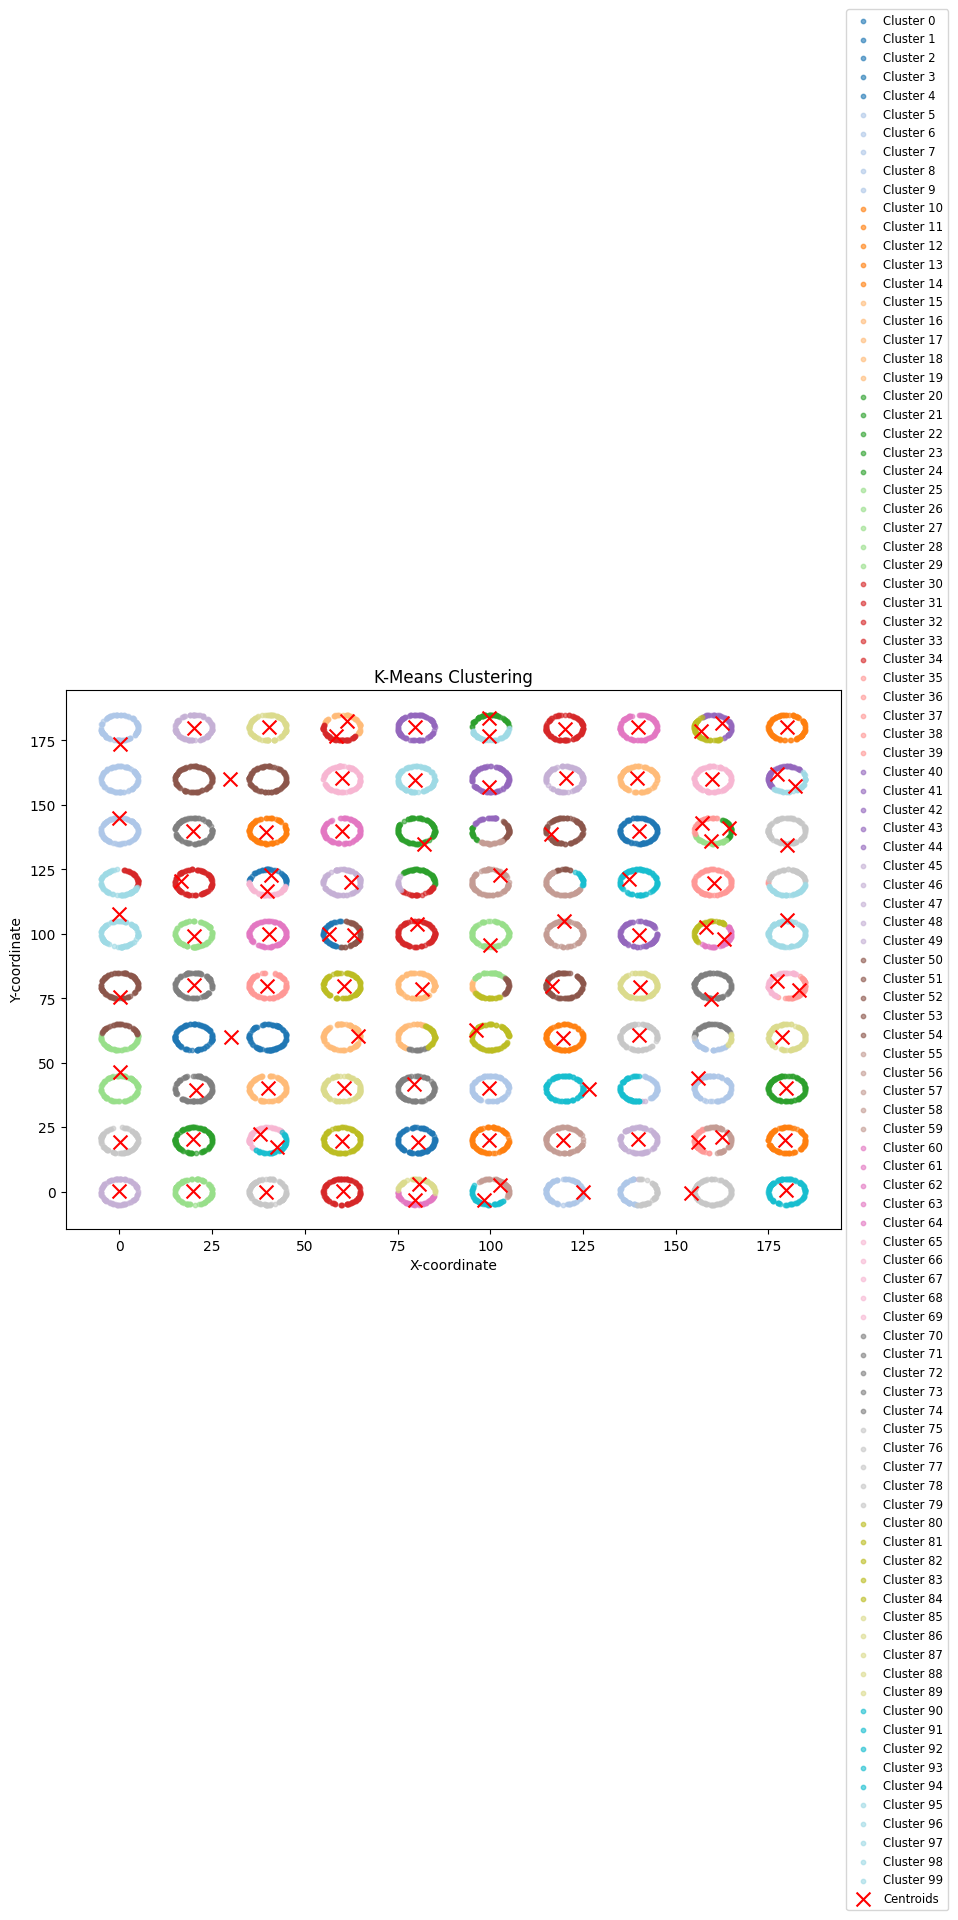

In [ ]:
def plot_clusters(data, clusters, centroids, k):
    plt.figure(figsize=(10, 7))

    #Assign unique colors to clusters
    colors = plt.cm.get_cmap("tab20", k)

    #Plotting each cluster
    for cluster_id in range(k):
        cluster_points = data[clusters == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                    s=10, color=colors(cluster_id), label=f'Cluster {cluster_id}', alpha=0.6)

    #Plotting the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], 
                s=100, color='red', marker='x', label='Centroids')

    #Add labels and legend
    plt.title("K-Means Clustering")
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")

    #Move the legend outside the plot
    plt.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

    plt.tight_layout()  
    plt.show()

clusters = np.array(clusters)

plot_clusters(coordinates, clusters, centroids, k)
